# Movie Industry

*Project Introduction.*

**Data Visualization Professors:** Qiwei Han, Íñigo Rituerto de Troya

**Project by:** *Group 7*<br>
40755 | Alessandro Gambetti  <br>
29712 | Édi Ferreira  <br>
26068 | Mónica Pereira <br>
23813 | Tomás Portas <br>


**Intro**<br>
The report will consist on the study of rating datasets collected by GroupLens Research from the MovieLens web site.<br>
It is mostly focused on the financial prespective over the data and, therefore, the analysis performed was based on the point of view of an investor in the Entertainment Industry (e.g. Instead of trying to understand which movies have better rating, it was tested if the rating has any correlation with the profitability of the movie).  <br>
<br>
**Contents** <br>
0. Data Import<br>
1. Data Curation<br>
2. Budget, Revenue and Profitability Index<br>
3. Movie Characteristics<br>
4. Companies<br>
5. Actors<br>
6. Conclusions<br>
7. Sources<br>
<br>

- **For the Midterm**, the group presents the chapters 1, 4 and 5 as a brief visualization of the dataset and some first insights.

# 0. Data Import


*Data imports and first insights regarding useful information for each dataset.*





In [1]:
# Import libraries:

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Import datasets:

genome_scores = pd.read_csv('Data/genome-scores.csv')# useless, related with tags
genome_tags = pd.read_csv('Data/genome-tags.csv')# useless, related with tags
links = pd.read_csv('Data/links.csv')# USEFUL, but drop 'imdbID'
movies = pd.read_csv('Data/movies.csv')# USEFUL, starting point
ratings = pd.read_csv('Data/ratings.csv')# useless, since it is about ratings given by individual userID's
tags = pd.read_csv('Data/tags.csv')# useless, related with tags
tmdb_credits = pd.read_csv('Data/tmdb_5000_credits.csv')# USEFUL, but drop 'crew'+'title' since the merge will be by movieID
tmdb_movies = pd.read_csv('Data/tmdb_5000_movies.csv')# USEFUL, drop a lot of categories (many already present in others)

# 1. Data Curation
*Exploration of the available datasets, by dropping columns and merging information, in order to create a new Master Dataframe with all the information necessary to draw conclusions.*

In [3]:
# Drop useless columns:

links.drop(columns='imdbId', inplace=True)
tmdb_credits.drop(columns=['title','crew'], inplace=True)
tmdb_movies.drop(columns=['genres','homepage','keywords','original_title','overview','spoken_languages','status','tagline','title'], inplace=True)

In [4]:
# Merge useful datasets and respective columns:

master_df = pd.merge(movies, links, on='movieId')
master_df = pd.merge(master_df, tmdb_credits, left_on='tmdbId', right_on='movie_id')
master_df = pd.merge(master_df, tmdb_movies, left_on='tmdbId', right_on='id')
master_df.drop(columns=['movie_id','id'], inplace=True)

In [5]:
# Treat values below $5000 as NaN since, after comparing the data with the website from where it was retrieved, the group found that threshold reasonable to avoid wrong data entries

master_df['revenue'] = master_df['revenue'].apply(lambda x: np.nan if x < 5000 else x)
master_df['budget'] = master_df['budget'].apply(lambda x: np.nan if x < 5000 else x)

In [6]:
# Divide all the revenues and budgets to have numbers in millions -> easier to read 
one_mln = 1000000
master_df['revenue'] = master_df['revenue'] / one_mln
master_df['budget'] = master_df['budget'] / one_mln

In [7]:
# Add a profitability index column (assumming, as a comparison parameter, revenues/budget)

master_df['profitability_index'] = master_df['revenue'] / master_df['budget']

In [8]:
# Re-order columns for a better overview:

master_df = master_df[['movieId', 'tmdbId', 'title', 'genres', 'original_language', 'release_date', 'runtime', 
                      'cast', 'production_companies', 'production_countries', 'popularity', 'vote_average', 
                      'vote_count', 'revenue', 'budget', 'profitability_index']]

In [9]:
master_df.describe()

,movieId,tmdbId,runtime,popularity,vote_average,vote_count,revenue,budget,profitability_index
count,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,3145.000000,3427.000000,3014.000000
mean,40449.069080,34743.342560,108.164892,21.823960,6.227490,713.394133,114.616693,37.472368,11.407971
std,40169.811811,53696.436846,20.763116,26.930074,0.938099,1224.924780,176.235395,41.726163,247.621328
min,1.000000,5.000000,0.000000,0.001117,0.000000,0.000000,0.006399,0.007000,0.000256
25%,3735.000000,8066.500000,94.000000,6.056306,5.700000,75.000000,16.519460,9.800000,1.030640
50%,30898.000000,12207.000000,104.000000,14.282314,6.300000,271.000000,51.842679,25.000000,2.301077
75%,75967.500000,38751.000000,118.000000,28.853540,6.900000,773.500000,137.587063,50.000000,4.417786
max,131013.000000,318040.000000,338.000000,724.247784,10.000000,13752.000000,2787.965087,380.000000,12890.386667


In [10]:
# Overview of the Master DataFrame:

master_df.head(3)

,movieId,tmdbId,title,genres,original_language,release_date,runtime,cast,production_companies,production_countries,popularity,vote_average,vote_count,revenue,budget,profitability_index
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,en,1995-10-30,81.0,"[{""cast_id"": 14, ""character"": ""Woody (voice)"",...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",73.640445,7.7,5269,373.554033,30.0,12.451801
1,10,710.0,GoldenEye (1995),Action|Adventure|Thriller,en,1995-11-16,130.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",59.824565,6.6,1174,352.194034,58.0,6.072311
2,11,9087.0,"American President, The (1995)",Comedy|Drama|Romance,en,1995-11-17,106.0,"[{""cast_id"": 1, ""character"": ""Andrew Shepherd""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11.056763,6.5,195,107.879496,62.0,1.739992


# 2. Budget, Revenue and Profitability Index by Genre
*Analysis of the correlations between revenues and budget for each movie genre, such as the corresponding profitability index.*

# 3. Movie Caracteristics
*General Analysis on the best-movies caracteristics regarding launch date (by years and seasons), taking into account the inflation over time.*

# 4. Companies
*Identification of the best film-producers out there, regarding profitability and votes.*


In [11]:
# From 'production_companies', select the producer of each movie and form a new column :

for_profit = master_df.reset_index(drop=True)

for_profit['producer_as_list'] = np.nan
for_profit['producer_as_string']= np.nan

for i in range(master_df.shape[0]):
    l = eval((for_profit['production_companies'][i]))
    lista = [d['name'] for d in l]
    for_profit['producer_as_list'][i] = lista
    for_profit['producer_as_string'][i] = ', '.join(lista)
                                    
for_profit.head(2)

,movieId,tmdbId,title,genres,original_language,release_date,runtime,cast,production_companies,production_countries,popularity,vote_average,vote_count,revenue,budget,profitability_index,producer_as_list,producer_as_string
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,en,1995-10-30,81.0,"[{""cast_id"": 14, ""character"": ""Woody (voice)"",...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",73.640445,7.7,5269,373.554033,30.0,12.451801,[Pixar Animation Studios],Pixar Animation Studios
1,10,710.0,GoldenEye (1995),Action|Adventure|Thriller,en,1995-11-16,130.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",59.824565,6.6,1174,352.194034,58.0,6.072311,"[United Artists, Eon Productions]","United Artists, Eon Productions"


In [12]:
# Count the number of times each producer executed a movie :

producers = []

for i in range(for_profit.shape[0]):
    producers.append(for_profit['producer_as_list'][i])

flatten = pd.Series([item for sublist in producers for item in sublist])

producers = flatten.groupby(flatten).size().rename_axis('producer').reset_index(name='count').sort_values(by='count', ascending=False).reset_index(drop=True)

# Make the parenthesis be seen as parenthesis in the loop below 
producers['producer'] = producers['producer'].apply(lambda x: x.translate(str.maketrans({"(": r"\(", ")": r"\)"})))

producers.head(20)

,producer,count
0,Warner Bros.,307
1,Universal Pictures,290
2,Paramount Pictures,277
3,Twentieth Century Fox Film Corporation,214
4,Columbia Pictures,189
5,New Line Cinema,153
6,Touchstone Pictures,117
7,Metro-Goldwyn-Mayer \(MGM\),114
8,Walt Disney Pictures,105
9,Relativity Media,102


In [13]:
# Calculate the average Profitability Index of the top 20 producers:

producers['PI_mean'] = np.nan
PI = []

for name in producers['producer']:
    PI.append(for_profit.loc[for_profit['producer_as_string'].str.contains(name)]['profitability_index'].mean())

for i in range(producers.shape[0]):
    producers['PI_mean'][i] = PI[i]

In [16]:
top20_producers = producers.sort_values(by='count', ascending = False)[:20]
top20_producers_sorted_PI = top20_producers.sort_values(by='PI_mean', ascending = False)
top20_producers_sorted_PI

,producer,count,PI_mean
14,United Artists,74,11.336574
17,Fox Searchlight Pictures,64,8.056990
11,Miramax Films,92,7.110683
5,New Line Cinema,153,6.599672
2,Paramount Pictures,277,5.631519
3,Twentieth Century Fox Film Corporation,214,5.573182
1,Universal Pictures,290,5.458977
7,Metro-Goldwyn-Mayer \(MGM\),114,5.173810
18,Dune Entertainment,57,4.174530
8,Walt Disney Pictures,105,3.818638


In [ ]:
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

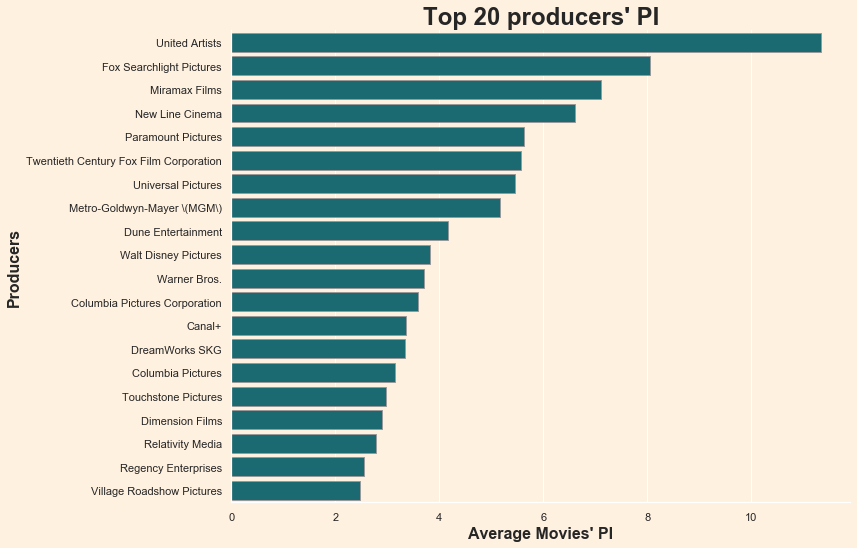

In [21]:
# Visualization of the top 20 producer companies and corresponding movies' average PI:
def graph_companies(data, y_col, x_col):
    color = 'FFF1E0'
    sns.set(rc={'axes.facecolor':color, 'figure.facecolor':color})

    g = sns.catplot(x=x_col, y=y_col, kind="bar", color='#0D7680', edgecolor=".6", height=8, aspect=1.5, data=data);

    plt.subplots_adjust(top=0.9)

    plt.xlabel("Average Movies' PI", fontsize = 16, fontweight = 'bold')
    plt.ylabel('Producers', fontsize = 16, fontweight = 'bold')
    plt.title("Top 20 producers' PI", fontsize = 24, fontweight = 'bold')
    

graph_companies(top20_producers_sorted_PI, 'producer', 'PI_mean')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text xticklabel objects>)

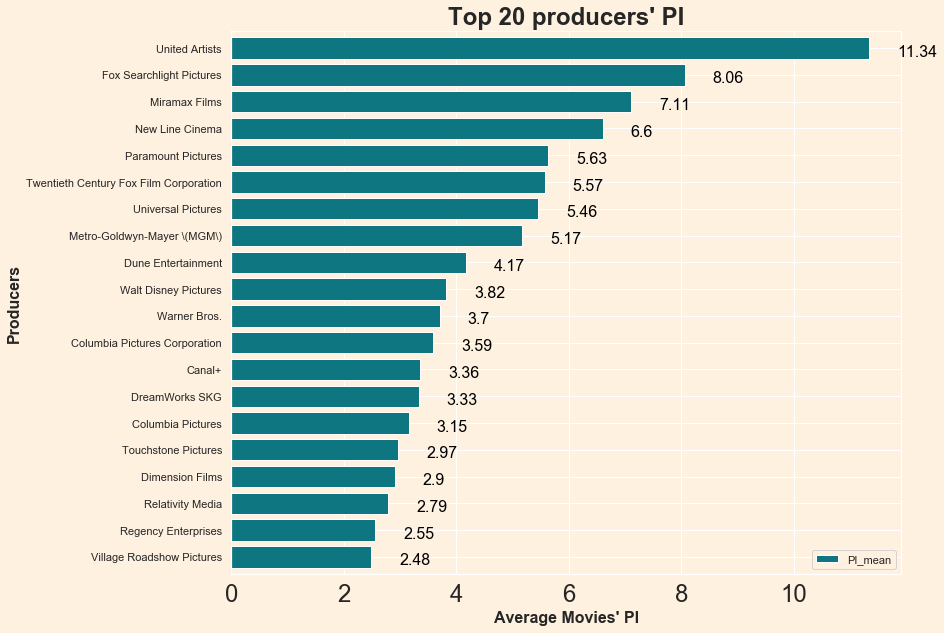

In [75]:
# Visualization of the top 20 producer companies and corresponding movies' average PI:
top20_producers_sorted_PI['PI_mean'] = top20_producers_sorted_PI['PI_mean'].apply(lambda x: round(x, 2))
top20_producers_sorted_PI.sort_values(by='PI_mean', ascending = True, inplace=True)
ax = top20_producers_sorted_PI[['PI_mean', 'producer']].set_index('producer').plot(kind = 'barh', figsize = (12, 10), width = 0.8, color = '#0D7680')

#setting the text for each barplot 
for i, v in enumerate(top20_producers_sorted_PI['PI_mean']):
    ax.text(v + 0.5, i -0.3 , str(v), color='black', fontsize = 16)

plt.xlabel("Average Movies' PI", fontsize = 16, fontweight = 'bold')
plt.ylabel('Producers', fontsize = 16, fontweight = 'bold')
plt.title("Top 20 producers' PI", fontsize = 24, fontweight = 'bold')   
plt.xticks(fontsize = 24)

**Findings:**<br>
Taking the perspective of an investor in the Entertainment Industry, it would be interesting to know what are the top Movie Producers to work with. This way, and according to the previous bar chart, it is visible that United Artists is the one with a higher profitability index (regarding revenues / budget = 11.33), featuring twice the index of the 5th. Fox Searchlight Pictures and Miramax Films complete the top 3 with PI of arround 8 and 7, respectivelly. 

# 5. Actors
*Indentification of the best main actors, according to producers' profitability and votes.*

In [31]:
# From 'cast', select the 3 main characters of each movie and form a new column (assumming they are by order):

for_profit['actor_as_list'] = np.nan
for_profit['actor_as_string']= np.nan

for i in range(for_profit.shape[0]):
    l = eval((for_profit['cast'][i]))
    lista = [d['name'] for d in l]
    for_profit['actor_as_list'][i] = lista[:3]
    for_profit['actor_as_string'][i] = ', '.join(lista[:3])

for_profit.head(2)

,movieId,tmdbId,title,genres,original_language,release_date,runtime,cast,production_companies,production_countries,popularity,vote_average,vote_count,revenue,budget,profitability_index,producer_as_list,producer_as_string,actor_as_list,actor_as_string
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,en,1995-10-30,81.0,"[{""cast_id"": 14, ""character"": ""Woody (voice)"",...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",73.640445,7.7,5269,373.554033,30.0,12.451801,[Pixar Animation Studios],Pixar Animation Studios,"[Tom Hanks, Tim Allen, Don Rickles]","Tom Hanks, Tim Allen, Don Rickles"
1,10,710.0,GoldenEye (1995),Action|Adventure|Thriller,en,1995-11-16,130.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",59.824565,6.6,1174,352.194034,58.0,6.072311,"[United Artists, Eon Productions]","United Artists, Eon Productions","[Pierce Brosnan, Sean Bean, Izabella Scorupco]","Pierce Brosnan, Sean Bean, Izabella Scorupco"


In [32]:
# Count the number of times each actor participated in a movie as one of the 3 main characters:

actors = []

for i in range(for_profit.shape[0]):
    actors.append(for_profit['actor_as_list'][i])

flatten = pd.Series([item for sublist in actors for item in sublist])

actors = flatten.groupby(flatten).size().rename_axis('actor').reset_index(name='count').sort_values(by='count', ascending=False).reset_index(drop=True)
actors.head()

,actor,count
0,Robert De Niro,41
1,Bruce Willis,35
2,Samuel L. Jackson,34
3,Nicolas Cage,34
4,Matt Damon,33


In [33]:
# Calculate the average Profitability Index of the 200 most famous actors (who have participated in more movies):

actors['PI_mean'] = np.nan
PI = []

for name in actors['actor']:
    PI.append(for_profit.loc[for_profit['actor_as_string'].str.contains(name)]['profitability_index'].mean())

for i in range(actors.shape[0]):    
    actors['PI_mean'][i] = PI[i]

famous_actors = actors.sort_values(["count"], ascending=False)[:200]
famous_actors.head()

,actor,count,PI_mean
0,Robert De Niro,41,3.667470
1,Bruce Willis,35,3.106557
2,Samuel L. Jackson,34,3.488611
3,Nicolas Cage,34,2.229437
4,Matt Damon,33,3.248942


In [34]:
# Within the most famous actors, identification of the 20 most profitable ones:

top_actors = famous_actors.sort_values(["PI_mean"], ascending=False)[:20]
top_actors

,actor,count,PI_mean
45,Mel Gibson,21,15.846467
35,Sean Connery,22,14.129082
151,Patrick Wilson,13,13.008583
160,Danny Glover,13,12.469208
150,Rose Byrne,13,10.197712
95,Clint Eastwood,16,9.491782
23,Sylvester Stallone,24,8.776761
14,Harrison Ford,26,8.113196
188,Paul Newman,12,7.271833
113,Jack Nicholson,15,7.184451


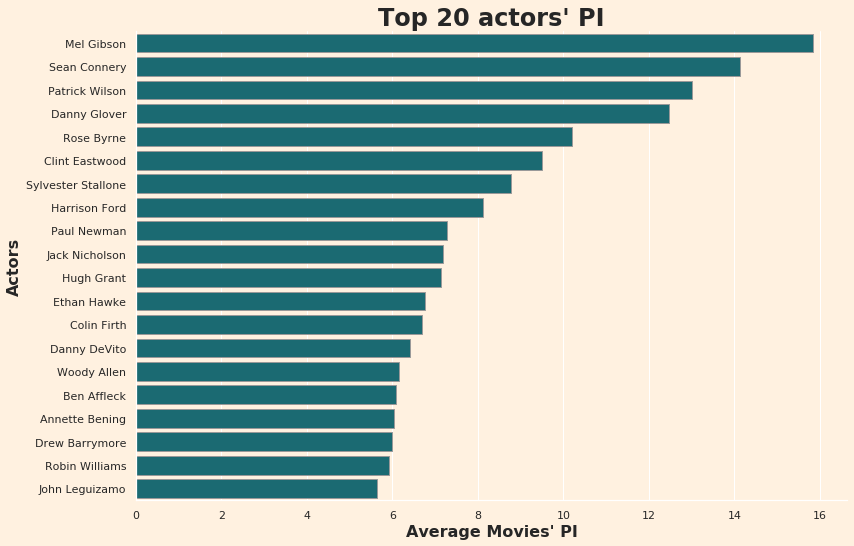

In [35]:
# Visualization of the top 20 actors and corresponding movies' average PI:

color = 'FFF1E0'
sns.set(rc={'axes.facecolor':color, 'figure.facecolor':color})

PD = top_actors.sort_values(['PI_mean'], ascending=False).reset_index(drop=True)

g = sns.catplot(x="PI_mean", y="actor", kind="bar", color='#0D7680', edgecolor=".6", height=8, aspect=1.5, data=PD);

plt.subplots_adjust(top=0.9)

plt.xlabel("Average Movies' PI", fontsize = 16, fontweight = 'bold')
plt.ylabel('Actors', fontsize = 16, fontweight = 'bold')
plt.title("Top 20 actors' PI", fontsize = 24, fontweight = 'bold');

**Findings:**<br>
Regarding top actors in the Entertainment Industry, the group noticed that Mel Gilbson, Sean Connery and Patrick Wilson are the ones to call if a Producer wants to get high profits. This means that, among the most famous actors, there 3 are the ones who have participated, on average, in the most profitable movies of all times!


# 6. Conclusions

# 7. Sources